<a href="https://colab.research.google.com/github/avellar1975/puc_minas/blob/main/notebook/Disciplina_10/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementação de Algoritmos de Machine Learning
## Aplicação de Aprendizagem de Máquina

# Módulo 1

Arquivos que serão utilizados nos módulos

In [51]:
arquivo1 = "https://raw.githubusercontent.com/avellar1975/puc_minas/main/dataset/Disciplina_10/arquivo_01.csv"
imoveis_df = pd.read_csv(arquivo1)
imoveis_df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [52]:
imoveis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


## Função de custo

## Gradiente descendente

## Regressão linear univariável

# Modulo 2

## Regressão linear multivariável

## Regressão logística

## Função de ativação Sigmoid

# Módulo 3

## Bias x Variance

## Overfitting

## Regularização

## Métricas de modelo

# Módulo 4

## A anatomia das redes neurais

## Gradiente descendente e Backpropagation

## Batch-learning, mini-batch e stochastic learning

## Tipos de funções de ativação

## CNN

## Aplicações e perspectiva

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder as le

#le = LabelEncoder()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
#Adicione o caminho do seu arquivo aqui.
file2 = "/content/drive/MyDrive/PUC_MINAS/10 - Implementação de algoritmos de Machine Learning/winequality-red.csv"
wine_df = pd.read_csv(file2)

In [ ]:
wine_df

In [7]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [14]:
class MachineLearningPipeline:
  def __init__(self,df):
    self.df = df
  
  def dataCleaning(self):
    self.df.dropna()

  def selectColumn(self):
    self.X = self.df[['fixed acidity']].values
    self.y = self.df['quality'].values
    
  
  def trainTestSplit(self):
    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=0)
  

In [15]:
pipeline = MachineLearningPipeline(wine_df)
pipeline.dataCleaning()
pipeline.selectColumn()
pipeline.trainTestSplit()

# Regressão Univariável

In [16]:
pipeline.df[['fixed acidity','quality']]

,fixed acidity,quality
0,7.4,5
1,7.8,5
2,7.8,5
3,11.2,6
4,7.4,5
...,...,...
1594,6.2,5
1595,5.9,6
1596,6.3,6
1597,5.9,5


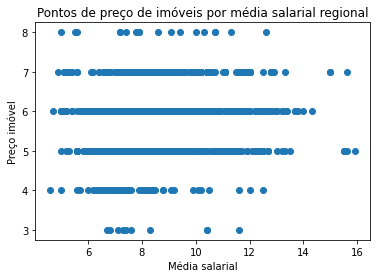

In [17]:
plt.scatter(pipeline.X,pipeline.y)
plt.title('Pontos de preço de imóveis por média salarial regional')
plt.xlabel('Média salarial')
plt.ylabel('Preço imóvel')
plt.show()

In [18]:
def plot_regression_line(x, y, theta0, theta1):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
  
    # predicted response vector
    y_pred = theta0 + theta1*x
  
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
  
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
  
    # function to show plot
    plt.show()

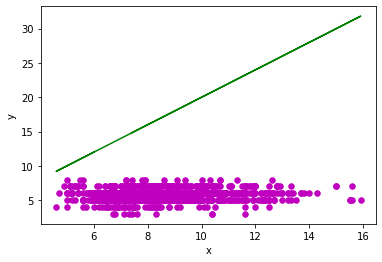

In [19]:
plot_regression_line(pipeline.X,pipeline.y,0,2)

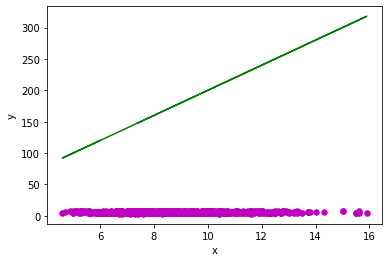

In [20]:
plot_regression_line(pipeline.X,pipeline.y,0,20)

In [21]:
def funcao_custo(theta0, theta1, X, y):
  m = len(X)
  elem = list(range(1,m))

  J = (1/2*m) * sum([(theta0 + theta1*X[i]) - y[i] for i in elem]) ** 2
  return J

In [22]:
def hypothesis(theta0, theta1, X):
    return theta0 + theta1*X

In [23]:
def gradient_descent(X, y, alpha, num_iteracoes):
  theta0 = 0
  theta1 = 0

  m = len(y)
  errors = []
  for i in range(0,num_iteracoes):
    h_theta = hypothesis(theta0, theta1, X)
    theta0 -= alpha*(sum(h_theta-y))/m
    theta1 -= alpha * (np.sum((h_theta - y) * X)/m)
    errors.append(funcao_custo(theta0, theta1, X, y))
  return theta0, theta1, errors

In [45]:
result = gradient_descent(np.log(pipeline.X), np.log(pipeline.y), 0.00025, 60)

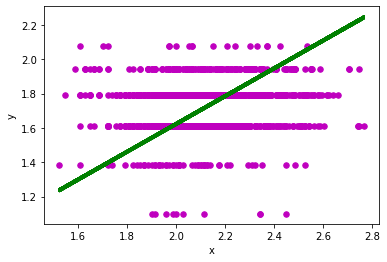

In [46]:
plot_regression_line(np.log(pipeline.X), np.log(pipeline.y),result[0],result[1])

 ...]

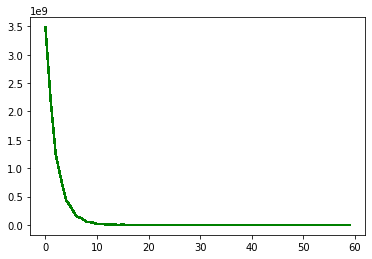

In [47]:
plt.plot(result[2], color = "g")

In [48]:
result = gradient_descent(np.log(pipeline.X), np.log(pipeline.y), 0.001, 50)

 ...]

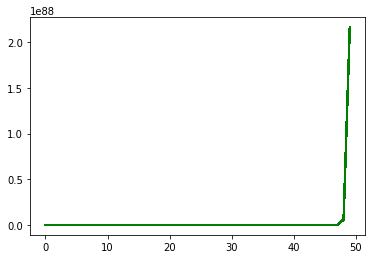

In [50]:
plt.plot(result[2], color = "g")